#Modelo para previsão de Aluguel para imóveis do "Sexto Andar"

##Irá ser utilizada a Regressão Linear para prever o custo do aluguel de um imóvel, baseado na área, se é mobiliado, número de quartos, de banheiros, vagas na garagem e o valor do seguro

In [1]:
import pandas as pd # biblioteca de processamento
from sklearn.linear_model import LinearRegression  #biblioteca de Regressão Linear
import matplotlib.pyplot as plt #biblioteca para graf
import seaborn as sns
from sklearn.model_selection import train_test_split #biblioteca para treino e teste de dados
from sklearn import metrics #usei para calcular o R²
import numpy as np
from sklearn.metrics import mean_squared_error #Calcular o EQM

In [2]:
df = pd.read_csv("/content/aluguel.csv", sep=';')
#li o arq csv e usei "sep=;", já que as colunas estão separadas em ;

In [3]:
df.head()

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


##Usando o método describe para ver informações úteis, como a média da área de todos os imóveis, ou o número de quartos e banheiros por exemplo

In [4]:
df.describe().round(2)

,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
count,10685.00,10685.00,10685.00,10685.00,10685.00,10685.00,10685.00,10685.00,10685.00,10685.00,10685.00,10685.00
mean,149.16,2.51,2.24,1.61,5.04,0.78,0.24,918.75,3890.42,335.56,53.22,5198.13
std,537.16,1.17,1.41,1.59,5.36,0.42,0.43,1166.98,3381.83,677.80,47.35,4473.38
min,11.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,1.00,1.00,0.00,170.00,1530.00,38.00,21.00,2061.00
50%,90.00,2.00,2.00,1.00,3.00,1.00,0.00,560.00,2650.00,125.00,36.00,3578.00
75%,182.00,3.00,3.00,2.00,8.00,1.00,0.00,1235.00,5000.00,375.00,68.00,6758.00
max,46335.00,13.00,10.00,12.00,51.00,1.00,1.00,32000.00,30000.00,28120.00,451.00,32750.00


In [5]:
df.info() #só para ver o tipo dos itens

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10685 entries, 0 to 10684
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cidade            10685 non-null  object
 1   area              10685 non-null  int64 
 2   quartos           10685 non-null  int64 
 3   banheiros         10685 non-null  int64 
 4   vagas_garagem     10685 non-null  int64 
 5   andar             10685 non-null  int64 
 6   aceita_animal     10685 non-null  int64 
 7   mobiliaria        10685 non-null  int64 
 8   valor_condominio  10685 non-null  int64 
 9   valor_aluguel     10685 non-null  int64 
 10  valor_iptu        10685 non-null  int64 
 11  valor_seguro      10685 non-null  int64 
 12  valor_total       10685 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


##Usando o método de correlação para ver como os dados se relacionam entre si, mas principalmente como os dados se relacionam com a variável "valor_aluguel"

In [6]:
#mede a relação entre 2 variáveis, ou seja, se o preço for maior, a dist_praia vai ser menor
# Selecionar apenas as colunas numéricas do DataFrame
dados_numericos = df.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação apenas para as colunas numéricas
correlacao = dados_numericos.corr().round(4)

# Exibir a matriz de correlação
correlacao

,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
area,1.0000,0.1937,0.2266,0.1937,-0.0137,0.0395,0.0082,0.0813,0.1809,0.1868,0.1884,0.1883
quartos,0.1937,1.0000,0.7343,0.6174,-0.0913,0.1716,-0.0808,0.2763,0.5440,0.4007,0.5681,0.5501
banheiros,0.2266,0.7343,1.0000,0.6973,0.0066,0.1186,0.0182,0.4006,0.6697,0.5057,0.6781,0.6946
vagas_garagem,0.1937,0.6174,0.6973,1.0000,-0.0245,0.1270,-0.0047,0.2845,0.5784,0.4645,0.5978,0.5882
andar,-0.0137,-0.0913,0.0066,-0.0245,1.0000,-0.0273,0.1229,0.3330,0.0868,0.0613,0.0185,0.1620
aceita_animal,0.0395,0.1716,0.1186,0.1270,-0.0273,1.0000,-0.0885,0.0193,0.0672,0.0655,0.0787,0.0666
mobiliaria,0.0082,-0.0808,0.0182,-0.0047,0.1229,-0.0885,1.0000,0.1177,0.1655,0.0271,0.1432,0.1615
valor_condominio,0.0813,0.2763,0.4006,0.2845,0.3330,0.0193,0.1177,1.0000,0.4319,0.4154,0.3519,0.6540
valor_aluguel,0.1809,0.5440,0.6697,0.5784,0.0868,0.0672,0.1655,0.4319,1.0000,0.5012,0.9872,0.9551
valor_iptu,0.1868,0.4007,0.5057,0.4645,0.0613,0.0655,0.0271,0.4154,0.5012,1.0000,0.4920,0.6440


In [7]:
df.rename(columns={'mobiliaria': 'mobiliado'}, inplace=True) #renomeei


In [8]:
df1 = df[["valor_aluguel", "area", "mobiliado", "quartos","banheiros","vagas_garagem","valor_seguro"]]

#usei um DataFrame apenas com as variáveis que eu irei utilizar no meu modelo

In [9]:
#Modelo para prever a variável VALOR_ALUGUEL a partir da AREA

X = df1[["area"]]
y = df1[["valor_aluguel"]]




#Modelo 1: Usando apenas a Área

In [10]:
reg = LinearRegression() #atribuindo a regressão linear a uma variável

In [11]:
reg.fit(X,y) #fazendo o treino de todos os dados

LinearRegression()

In [12]:
#custo = b0 + b1 x1 + b2 x2 = b0 + bX
#encontrando o Intercepto e Coeficiente
print("O Intercepto da regessão é:",reg.intercept_)

print("O coeficiente da regressão é:",reg.coef_)


O Intercepto da regessão é: [3720.56233392]
O coeficiente da regressão é: [[1.13876944]]


In [13]:
#Conta manual básica para entender o predict do valor com base na área
X = 320
b0 = reg.intercept_
b1 = reg.coef_[0]

valor_aluguel = b0 + b1 * X
print("O valor do aluguel por mês é de:", valor_aluguel.round(2))

O valor do aluguel por mês é de: [4084.97]


In [14]:
#Função básica para entender o predict do valor com base na área
def valor_aluguel (X):
  b0 = reg.intercept_
  b1 = reg.coef_[0]
  valor_aluguel = b0 + b1 * X
  return valor_aluguel.round(2)



In [15]:
valor_aluguel(320)

array([4084.97])

In [16]:
#Modelo para prever a variável VALOR_ALUGUEL a partir da AREA

X = df1[["area"]]
y = df1[["valor_aluguel"]]




#Separando o DataFrame em Treino e Teste

In [17]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=2811)

In [18]:
reg.fit(X_treino, y_treino) #treinando o modelo com a parte de TREINO

LinearRegression()

In [19]:
print('R² = {}'.format(reg.score(X_treino, y_treino).round(2))) #Validação R² do treino

R² = 0.03


In [20]:
y_hat = reg.predict(X_teste) #y_previsto

In [21]:
print('R² = %s' % metrics.r2_score(y_teste, y_hat).round(2))#Validação R² do treino

R² = 0.04


In [22]:
eqm = mean_squared_error(y_teste, y_hat)
print('EQM : {}'.format(round(eqm, 2))) #Validação EQM do TESTE

EQM : 11263826.97


In [23]:
#usando somente área:
#EQM:  11.263.826,97
#R² do treino: R² = 0.03
#R² do teste: R² = 0.04

#Modelo 2 adicionando mais uma variável (mobiliado)

In [24]:
#Modelo para prever a variável VALOR_ALUGUEL a partir da AREA

X = df1[['area', 'mobiliado']]
y = df1["valor_aluguel"]




#Separando o modelo em treino e teste


In [25]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25, random_state=2811)

In [26]:
regressao = LinearRegression()

In [27]:
regressao.fit(Xtreino,ytreino)

LinearRegression()

In [28]:
y_hat = regressao.predict(Xteste)

In [29]:
eqm = mean_squared_error(yteste, y_hat)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 10872912.75


In [30]:
print('R² = {}'.format(regressao.score(Xtreino, ytreino).round(2)))

R² = 0.05


In [31]:
print('R² = %s' % metrics.r2_score(yteste, y_hat).round(2))

R² = 0.07


In [32]:
regressao.coef_

array([9.37123580e-01, 1.23494905e+03])

In [33]:
b0 = regressao.intercept_
b1,b2= regressao.coef_
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)



b0 =  3434.982006525722
b1 =  0.9371235796181392
b2 =  1234.9490504732526


#Gráfico para traçar a reta de Valor do Aluguel, com base nas duas variáveis (área e mobiliado)

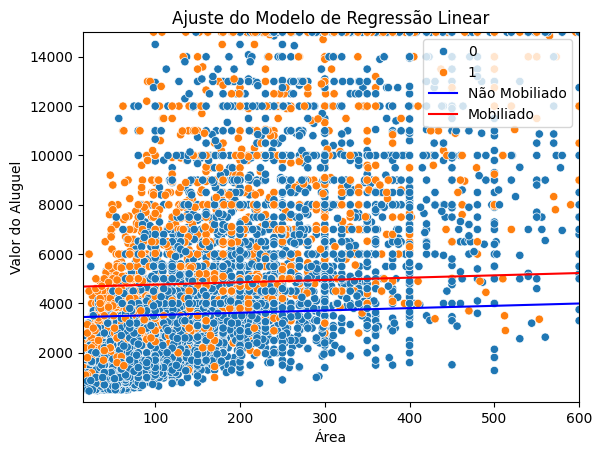

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Defina a faixa de valores de x (área)
x = np.arange(15, 600, 0.1)

# Calcule os valores de y para cada condição de mobiliado
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

# Crie o gráfico de dispersão com a opção hue para diferenciar por mobiliado
sns.scatterplot(x='area', y='valor_aluguel', hue='mobiliado', data=df1)

# Trace as linhas de ajuste para ambas as condições de mobiliado
plt.plot(x, y0, color='blue', label='Não Mobiliado')
plt.plot(x, y1, color='red', label='Mobiliado')

# Defina os limites do eixo x (área)
plt.xlim(15, 600)
plt.ylim(15, 15000)

# Adicione título e rótulos dos eixos
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('Área')
plt.ylabel('Valor do Aluguel')

# Exiba a legenda
plt.legend()

# Exiba o gráfico
plt.show()


In [36]:
entrada = Xteste[0:1]
entrada

,area,mobiliado
405,73,0


In [37]:
regressao.predict(entrada)[0]

3503.3920278378464

In [ ]:
#Validação com variável Área e Mobiliado
#EQM: 10.872.912,75
#R² treino: 0.05
#R² teste: 0.07

#Modelo 3: Adicioando mais uma variável (Número Quartos)

In [39]:
df1.head()

,valor_aluguel,area,mobiliado,quartos,banheiros,vagas_garagem,valor_seguro
0,3300,70,1,2,1,1,42
1,4960,320,0,4,4,0,63
2,2800,80,0,1,1,1,41
3,1112,51,0,2,1,0,17
4,800,25,0,1,1,0,11


In [40]:
#Modelo para prever a variável VALOR_ALUGUEL a partir da AREA

X = df1[['area', 'mobiliado','quartos']]
y = df1["valor_aluguel"]




#Separando o Data Frame em treino e teste

In [41]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25, random_state=2811)

In [42]:
regressao2 = LinearRegression()

In [43]:
regressao2.fit(Xtreino,ytreino)

LinearRegression()

In [44]:
y_hat = regressao2.predict(Xteste)

In [45]:
eqm = mean_squared_error(yteste, y_hat)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 7531282.28


In [46]:
print('R² = {}'.format(regressao2.score(Xtreino, ytreino).round(2)))

R² = 0.34


In [47]:
print('R² = %s' % metrics.r2_score(yteste, y_hat).round(2))

R² = 0.36


In [48]:
b0 = regressao2.intercept_
b1,b2,b3= regressao2.coef_
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)
print('b3 = ', b3)



b0 =  -517.7634027608228
b1 =  0.38201214688894775
b2 =  1611.4528063044434
b3 =  1577.0135135290714


In [50]:
entrada = Xteste[0:1]
entrada

,area,mobiliado,quartos
405,73,0,2


In [51]:
regressao2.predict(entrada)[0]

2664.150511020213

In [ ]:
#Validação com variável Área, Mobiliado, Número de quartos
#EQM: 7.531.282,28
#R² treino: 0.34
#R² teste: 0.36

#Modelo 4: Adicioando mais uma variável (Número Banheiros)

In [52]:
df1.head()

,valor_aluguel,area,mobiliado,quartos,banheiros,vagas_garagem,valor_seguro
0,3300,70,1,2,1,1,42
1,4960,320,0,4,4,0,63
2,2800,80,0,1,1,1,41
3,1112,51,0,2,1,0,17
4,800,25,0,1,1,0,11


In [53]:
#Modelo para prever a variável VALOR_ALUGUEL a partir da AREA

X = df1[['area', 'mobiliado','quartos','banheiros']]
y = df1["valor_aluguel"]




#Separando o Data Frame em treino e teste

In [54]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25, random_state=2811)

In [55]:
regressao3 = LinearRegression()

In [56]:
regressao3.fit(Xtreino,ytreino)

LinearRegression()

In [57]:
y_hat = regressao3.predict(Xteste)

In [58]:
eqm = mean_squared_error(yteste, y_hat)
print('EQM : {}'.format(round(eqm, 2)))#5.878.887,53

EQM : 5878887.53


In [59]:
print('R² = {}'.format(regressao3.score(Xtreino, ytreino).round(2)))

R² = 0.48


In [60]:
print('R² = %s' % metrics.r2_score(yteste, y_hat).round(2))

R² = 0.5


In [ ]:
b0 = regressao3.intercept_
b1,b2,b3,b4= regressao3.coef_
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)
print('b3 = ', b3)
print('b4 = ', b4)



In [62]:
entrada = Xteste[0:1]
entrada

,area,mobiliado,quartos,banheiros
405,73,0,2,1


In [63]:
regressao3.predict(entrada)[0]

1712.2724492933457

In [ ]:
#Validação com variável Área, Mobiliado, número de quartos e banheiros
#EQM: 5.878.887,53
#R² treino = 0.48
#R² teste = 0.5


#Modelo 5: Adicionando a Variável Vagas na Garagem

In [64]:
df.head(1)

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliado,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618


In [65]:
#Modelo para prever a variável VALOR_ALUGUEL a partir da AREA

X = df1[['area', 'mobiliado','quartos','banheiros','vagas_garagem']]
y = df1["valor_aluguel"]




#Separando o Data Frame em treino e teste

In [66]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25, random_state=2811)

In [67]:
regressao4 = LinearRegression()

In [68]:
regressao4.fit(Xtreino, ytreino)

LinearRegression()

In [69]:
y_hat = regressao4.predict(Xteste)

In [70]:
eqm = mean_squared_error(yteste, y_hat)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 5590265.87


In [71]:
print('R² = {}'.format(regressao4.score(Xtreino, ytreino).round(2)))

R² = 0.49


In [72]:
print('R² = %s' % metrics.r2_score(yteste, y_hat).round(2))

R² = 0.52


In [ ]:
b0 = regressao4.intercept_
b1,b2,b3,b4,b5= regressao4.coef_
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)
print('b3 = ', b3)
print('b4 = ', b4)
print('b5 = ', b5)


In [ ]:
X.columns

In [73]:
entrada = Xteste[0:1]
entrada

,area,mobiliado,quartos,banheiros,vagas_garagem
405,73,0,2,1,0


In [75]:
regressao4.predict(entrada)[0]

1420.1224159881513

In [77]:
#Validação com variável Área, Mobiliado, número de quartos, banheiros e vagas na garagem
#EQM: 5.590.265,87
#R² treino = 0.49
#R² teste = 0.52


In [76]:
df.head()

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliado,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


#Modelo 6: Adicionando mais uma variável("valor_seguro")

In [78]:
#Modelo para prever a variável VALOR_ALUGUEL a partir da AREA

X = df1[['area', 'mobiliado','quartos','banheiros','vagas_garagem','valor_seguro']]
y = df1["valor_aluguel"]




#Separando o Data Frame em treino e teste

In [79]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25, random_state=2811)

In [80]:
regressao5 = LinearRegression()

In [81]:
regressao5.fit(Xtreino, ytreino)

LinearRegression()

In [82]:
y_hat = regressao5.predict(Xteste)

In [83]:
eqm = mean_squared_error(yteste, y_hat)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 261383.48


In [84]:
print('R² = {}'.format(regressao5.score(Xtreino, ytreino).round(2)))

R² = 0.98


In [85]:
print('R² = %s' % metrics.r2_score(yteste, y_hat).round(2))

R² = 0.98


In [86]:
entrada = Xteste[0:1]
entrada


,area,mobiliado,quartos,banheiros,vagas_garagem,valor_seguro
405,73,0,2,1,0,37


In [87]:
regressao5.predict(entrada)[0]

2706.4059855268274

In [ ]:
#EQM: 261.383,48
#R² treino = 0.98
#R² teste = 0.98

#Buscando sempre diminuir o EQM e aumentar o R² o mais próximo de 1, porém tomando cuidado com o overfitting do modelo

In [ ]:
#ANALISANDO O OVERFITTING

preditos_treino = regressao5.predict(Xtreino)
preditos_teste = regressao5.predict(Xteste)

#Comparo o EQM do treino e do teste
#caso o EQM do treino for muito baixo, e o EQM do teste for muito alto, significa
#que o modelo está em OVERFITTING, uma vez que ele só é bom no treino, quando chega no
#teste ele fica ruim

eqm_treino = mean_squared_error(ytreino, preditos_treino)
eqm_teste = mean_squared_error(yteste, preditos_teste)
print('EQM TREINO : {}'.format(round(eqm_treino, 2)))
print('EQM TESTE : {}'.format(round(eqm_teste, 2)))

#EQM TREINO : 282.518,2
#EQM TESTE : 261.383,48

#aqui é notável que o EQM dos dois está parecido
#logo o modelo se ajusta bem tanto ao TREINO como ao TESTE

#Conclusão:

##Foram criados 6 modelos, adicionando uma variável em cada, e notou-se que o melhor modelo foi o Modelo 6, que foi usando 'area', 'mobiliado','quartos','banheiros','vagas_garagem','valor_seguro'.

####Além disso, nota-se que a inclusão da variável "valor_seguro" foi a mais significativa para o modelo, uma vez que foi a com mais impacto no EQM e no R².

####A conclusão de utilizar as variáveis 'banheiros','vagas_garagem','valor_seguro' veio através do método corr() utilizado lá no começo, que identifica como as variáveis se relacionam, e é notável que essas 3 variáveis tem grande impacto no 'valor_aluguel', além de usar as variáveis "padrões" como área, mobiliado e número de quartos

####No fim do modelo, fiz uma verificação de "Overfitting" para ter certeza que o modelo está bem ajustado para verificar o Valor do Aluguel